In [17]:
from src.Constituent import Constituent
from src.Constituency import Constituency
from src.Candidate import Candidate
from src.Names import *
import numpy as np
import math

In [18]:
parties = ['Green','Labour','Liberal Democrat','Conservative','UKIP','Independent']
national_party_bias = [0.05, 0.3, 0.2, 0.3, 0.1, 0.05]

In [19]:
def party_support(voters):
    support = {}
    for voter in voters: 
        if voter.get_support() in support.keys():
            support[voter.get_support()] += 1
        else:
            support[voter.get_support()] = 1
    return support

def party_leaning(voters):
    leaning = {}
    for voter in voters: 
        if voter.get_support() in leaning.keys():
            leaning[voter.get_support()].append(voter.get_leaning())
        else:
            leaning[voter.get_support()] = [voter.get_leaning()]
    for key in leaning.keys():
        leaning[key] = np.mean(leaning[key])
    return leaning

def build_candidate_list():
    parties = ['Green','Labour','Liberal Democrat','Conservative','UKIP']
    candidate_list = [Candidate(generate_name(),party, np.random.uniform(0,1),np.random.normal()) for party in parties]
    for i in range(np.random.randint(1,10)):
        candidate_list.append(Candidate(generate_name(),'Independent', np.random.uniform(0,1),np.random.normal()))
    return candidate_list

def constituency_bias(national_bias):
    local_bias = [1000*abs(np.random.normal(bias,0.005)) for bias in national_bias]
    local_bias = [bias/sum(local_bias) for bias in local_bias]
    return local_bias

In [20]:
def build_constituency(name, population):
    candidate_list = build_candidate_list()
    local_bias = constituency_bias(national_party_bias)
    return Constituency(name,population, candidate_list, parties, local_bias)

In [21]:
test_constituency = build_constituency('Test', 10000)
print(test_constituency)

Test, Population: 10000, Candidates: [Deborah Miller, Party: Green, Popularity: 0.9052131479498912, Leans: 0.06488743371230467, Dorothy Maclean, Party: Labour, Popularity: 0.3163521275122839, Leans: -1.9070110986363038, Russell Johnston, Party: Liberal Democrat, Popularity: 0.8253400484678074, Leans: 0.33501175145421386, Dorothy Jamieson, Party: Conservative, Popularity: 0.4560687912982945, Leans: -0.07932983199604376, Jose Hill, Party: UKIP, Popularity: 0.7435324181569553, Leans: 0.7042859721167114, Karen Wright, Party: Independent, Popularity: 0.9024621753556274, Leans: 0.7694904804421766, Juan Young, Party: Independent, Popularity: 0.2850195397012196, Leans: -0.6566147262279685, Victoria Graham, Party: Independent, Popularity: 0.4103827886130794, Leans: 0.7749993566436552, Alexander Sutherland, Party: Independent, Popularity: 0.8202255296713222, Leans: 0.8658491534206911, Margaret Ferguson, Party: Independent, Popularity: 0.4230640333386416, Leans: -0.10124462052227709, Virginia Ken

In [22]:
def first_past_the_post(voters, candidates):
    election_results = {}
    for voter in voters:
        vote = voter.vote(candidates)
        if vote.name in election_results.keys():
            election_results[vote.name] += 1
        else:
            election_results[vote.name] = 1
    return election_results

In [23]:
results = test_constituency.run_election(0.65, first_past_the_post)
print(results)
winner = max(results, key=results.get)
print(test_constituency.get_candidate_by_name(winner))

{'Dorothy Maclean': 1934, 'Deborah Miller': 569, 'Jose Hill': 617, 'Dorothy Jamieson': 1958, 'Russell Johnston': 1303, 'Alexander Sutherland': 42, 'Juan Young': 36, 'Margaret Ferguson': 10, 'Virginia Kennedy': 26, 'Victoria Graham': 5}
Dorothy Jamieson, Party: Conservative, Popularity: 0.4560687912982945, Leans: -0.07932983199604376


In [2]:
import pandas as pd

In [3]:
uk_election = pd.read_csv('Data/HoC-GE2019-results-by-constituency.csv')

In [27]:
uk_election.head()

,ONS ID,ONS region ID,Constituency name,County name,Region name,Country name,Constituency type,Declaration time,Member first name,Member surname,...,Green,SNP,PC,DUP,SF,SDLP,UUP,Alliance,All other candidates,Of which other winner
0,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,43812.10417,Stephen,Kinnock,...,450,0,2711,0,0,0,0,0,731,0
1,W07000058,W92000004,Aberconwy,Clwyd,Wales,Wales,County,43812.13125,Robin,Millar,...,0,0,2704,0,0,0,0,0,0,0
2,S14000001,S92000003,Aberdeen North,Scotland,Scotland,Scotland,Burgh,43812.13403,Kirsty,Blackman,...,880,20205,0,0,0,0,0,0,0,0
3,S14000002,S92000003,Aberdeen South,Scotland,Scotland,Scotland,Burgh,43812.14861,Stephen,Flynn,...,0,20388,0,0,0,0,0,0,0,0
4,S14000003,S92000003,Airdrie and Shotts,Scotland,Scotland,Scotland,County,43812.12431,Neil,Gray,...,685,17929,0,0,0,0,0,0,0,0


In [24]:
uk_election.keys()

Index(['ONS ID', 'ONS region ID', 'Constituency name', 'County name',
       'Region name', 'Country name', 'Constituency type', 'Declaration time',
       'Member first name', 'Member surname', 'Member gender', 'Result',
       'First party', 'Second party', 'Electorate', 'Valid votes',
       'Invalid votes', 'Majority', 'Con', 'Lab', 'LD', 'Brexit', 'Green',
       'SNP', 'PC', 'DUP', 'SF', 'SDLP', 'UUP', 'Alliance',
       'All other candidates', 'Of which other winner'],
      dtype='object')

In [4]:

uk_election.iloc[0]['Electorate'] - (uk_election.iloc[0]['Valid votes'] + uk_election.iloc[0]['Invalid votes'])

19070

In [45]:
uk_election.iloc[0]['Majority']

10490

In [41]:
parties = ['Con', 'Lab', 'LD', 'Brexit', 'Green', 'SNP', 'PC', 'DUP', 'SF', 'SDLP', 'UUP', 'Alliance','All other candidates']
major_parties = ['Con', 'Lab', 'LD', 'Brexit', 'Green', 'SNP', 'PC', 'DUP', 'SF']

Total_results = {party: 100* sum(uk_election[party])/sum(uk_election['Valid votes']) for party in parties}
Nseats = {}
for i in range(0,len(uk_election)):
    if uk_election.iloc[i]['First party'] in Nseats.keys():
        Nseats[uk_election.iloc[i]['First party']] += 1
    else:
        Nseats[uk_election.iloc[i]['First party']] = 1

Nseats = {party: Nseats[party]/len(uk_election) for party in Nseats.keys()}

#for i in range(0,len(uk_election)):
#    to_print = '{}, {}'.format(uk_election.iloc[i]['Constituency name'],uk_election.iloc[i]['Electorate'])
#    for party in parties:
#        to_print += ', {}'.format(uk_election.iloc[i][party])
#    print(to_print)

In [5]:
import pandas as pd
import geopandas as gpd


uk = gpd.read_file('Data/GB/westminster_const_region.shp')

In [6]:
uk.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Aberavon Co Const,WMC,Westminster Constituency,ABERAVON_CO_CONST,1,1,129128,24881,W07000049,18652.980,922.404,VA,CIVIL VOTING AREA,None,None,"POLYGON ((277338.188 183355.648, 277331.315 18..."
1,Aberconwy Co Const,WMC,Westminster Constituency,ABERCONWY_CO_CONST,2,2,131913,24852,W07000058,61851.377,1440.255,VA,CIVIL VOTING AREA,None,None,"POLYGON ((287117.800 344607.497, 287115.797 34..."
2,Aberdeen North Burgh Const,WMC,Westminster Constituency,ABERDEEN_NORTH_BURGH_CONST,3,3,127118,33486,S14000001,5691.472,952.515,VA,CIVIL VOTING AREA,None,None,"POLYGON ((384027.404 806411.397, 384415.400 80..."
3,Airdrie and Shotts Co Const,WMC,Westminster Constituency,AIRDRIE_AND_SHOTTS_CO_CONST,4,4,121842,33927,S14000003,22942.748,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((274977.098 672604.599, 274978.729 67..."
4,Aldershot Boro Const,WMC,Westminster Constituency,ALDERSHOT_BORO_CONST,5,5,70075,25022,E14000530,5298.258,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((483364.601 160961.804, 483370.702 16..."


In [7]:
uk_ni = gpd.read_file('Data/GB/PCON_DEC_2021_UK_BFE.shp')

In [8]:
uk_sindex = uk.sindex

# List to store indices of non-matching rows in uk_ni
non_matching_indices = []

# Iterate over polygons in uk_ni DataFrame
for index, row in uk_ni.iterrows():
    # Get the geometry of the current row
    geom = row['geometry']
    
    # Use spatial index to find potential matches in uk DataFrame
    possible_matches_index = list(uk_sindex.intersection(geom.bounds))
    
    # Filter the potential matches based on exact spatial relationship
    possible_matches = uk.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(geom)]
    
    # If there are no precise matches, add the index to the list of non-matching indices
    if precise_matches.empty:
        non_matching_indices.append(index)

# Create a subset of rows from uk_ni that are not in uk
non_matching_subset = uk_ni.loc[non_matching_indices]

# Print the subset
print("Rows in uk_ni that do not have a corresponding match in uk:")
print(non_matching_subset)

Rows in uk_ni that do not have a corresponding match in uk:
                                              geometry
533  POLYGON ((151304.866 533334.473, 151306.448 53...
534  POLYGON ((148936.501 537970.266, 148935.494 53...
535  POLYGON ((146877.019 529787.391, 146876.650 52...
536  POLYGON ((146429.210 529830.176, 146422.914 52...
537  MULTIPOLYGON (((154937.819 560100.012, 154937....
538  MULTIPOLYGON (((112146.842 601041.035, 112147....
539  POLYGON ((77309.471 527026.981, 77310.628 5270...
540  POLYGON ((71372.986 584583.833, 71376.549 5845...
541  POLYGON ((137333.470 526840.878, 137334.484 52...
542  POLYGON ((112237.352 552083.730, 112232.980 55...
543  POLYGON ((104203.830 517423.617, 104224.571 51...
544  MULTIPOLYGON (((118501.507 602780.663, 118498....
545  MULTIPOLYGON (((171992.925 533274.820, 171991....
546  POLYGON ((142383.451 552397.586, 142383.003 55...
547  MULTIPOLYGON (((133057.576 468966.989, 133053....
548  POLYGON ((172589.246 528576.706, 172589.050 52...
549  

<Axes: >

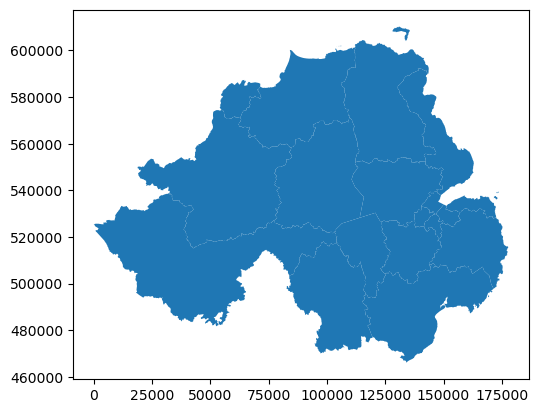

In [9]:
ni_subset = uk_ni.iloc[non_matching_indices]
ni_subset.plot()   

In [112]:
ni_subset.head()

,geometry
533,"POLYGON ((151304.866 533334.473, 151306.448 53..."
534,"POLYGON ((148936.501 537970.266, 148935.494 53..."
535,"POLYGON ((146877.019 529787.391, 146876.650 52..."
536,"POLYGON ((146429.210 529830.176, 146422.914 52..."
537,"MULTIPOLYGON (((154937.819 560100.012, 154937...."


In [10]:
ni_election = uk_election[uk_election['Region name']=='Northern Ireland']
ni_names = list(ni_election['Constituency name'])
print(ni_names)

['Belfast East', 'Belfast North', 'Belfast South', 'Belfast West', 'East Antrim', 'East Londonderry', 'Fermanagh and South Tyrone', 'Foyle', 'Lagan Valley', 'Mid Ulster', 'Newry and Armagh', 'North Antrim', 'North Down', 'South Antrim', 'South Down', 'Strangford', 'Upper Bann', 'West Tyrone']


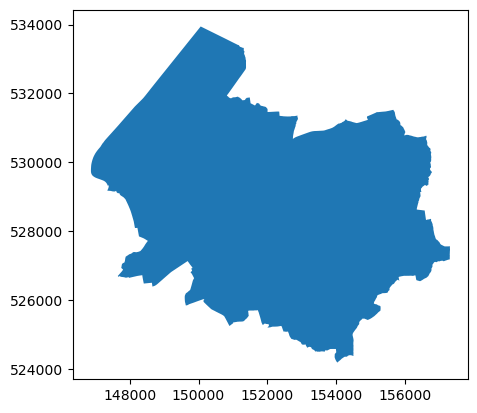

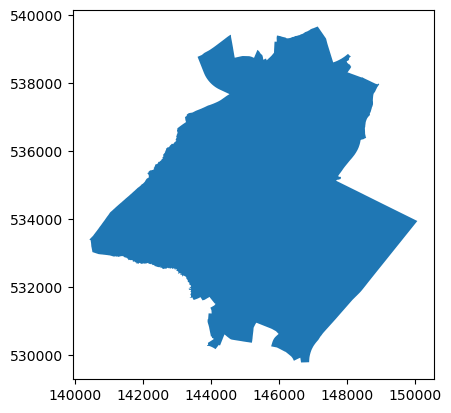

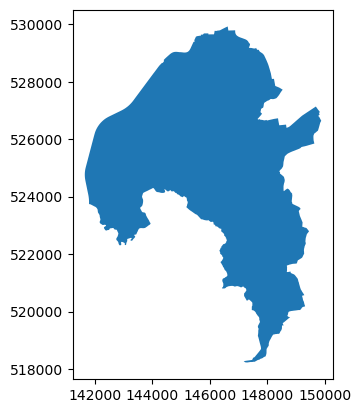

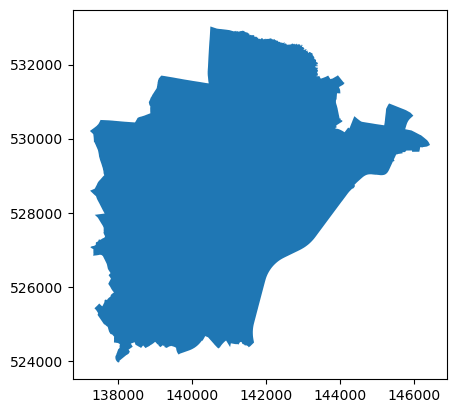

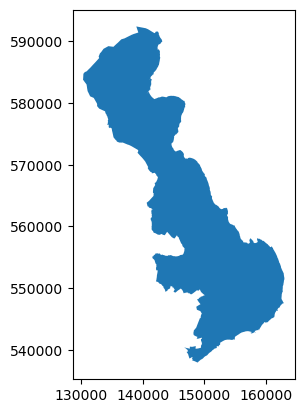

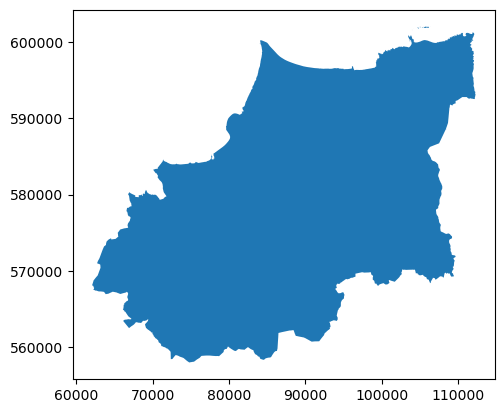

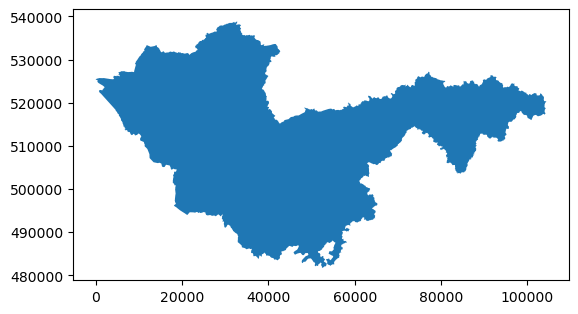

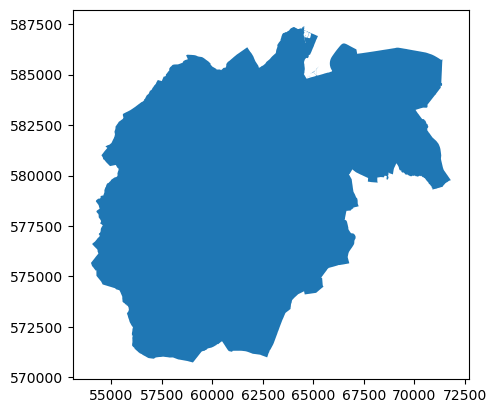

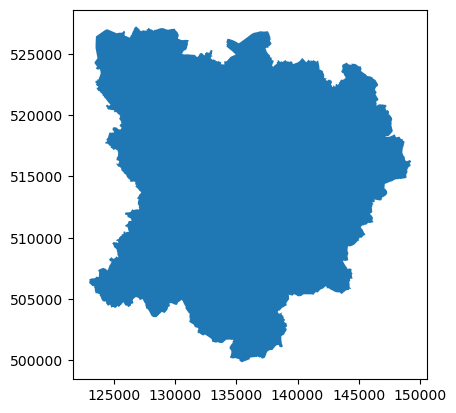

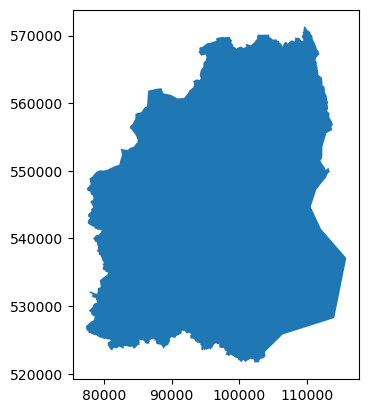

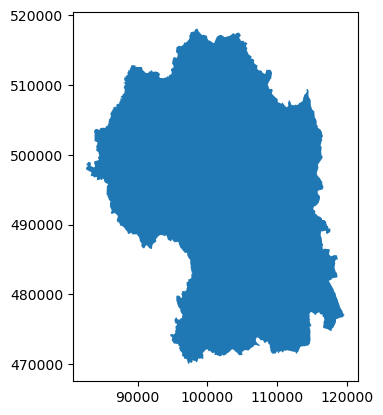

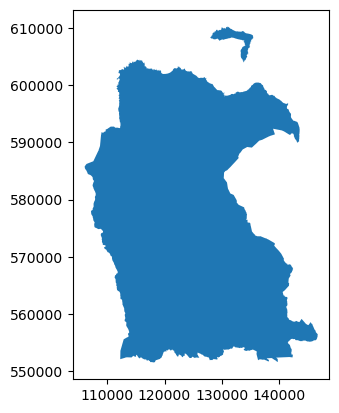

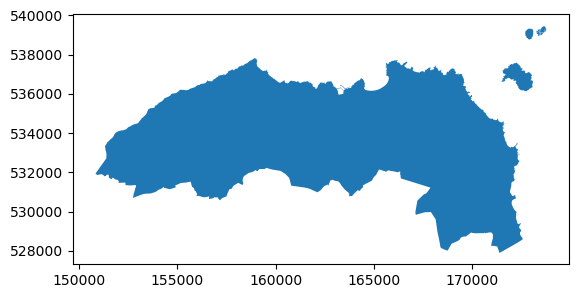

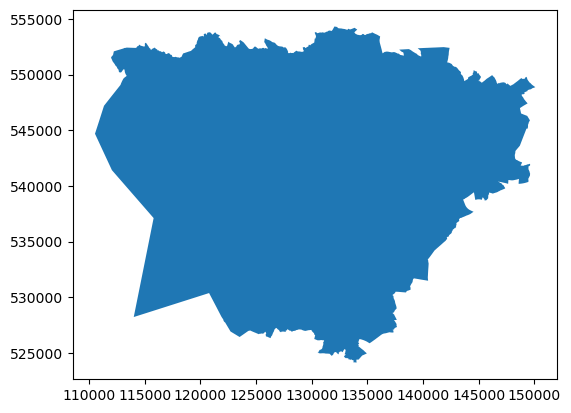

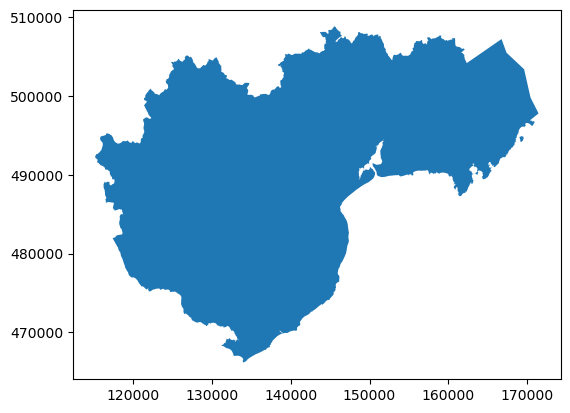

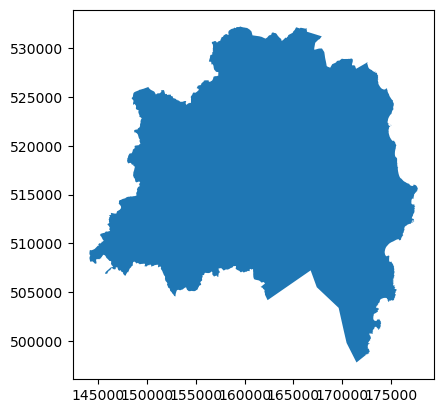

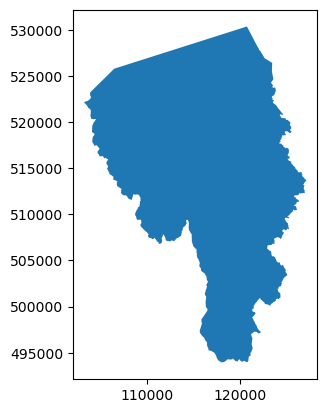

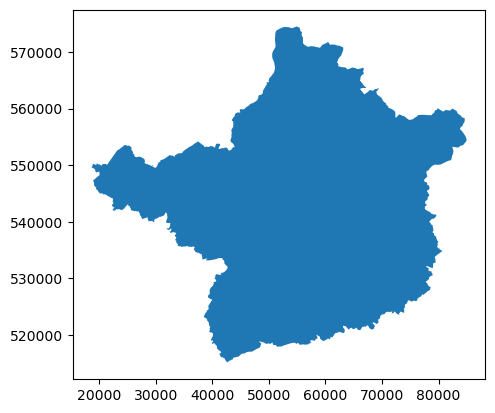

In [126]:
for i in range(533,533+len(ni_subset)):
    ni_subset.loc[[i],'geometry'].plot()

In [20]:
ni_subset.loc[[533]]

,geometry
533,"POLYGON ((151304.866 533334.473, 151306.448 53..."


In [24]:
gb_borders = uk[['NAME','CODE','geometry']].copy()
ni_subset_reset = ni_subset.reset_index(drop=True)
for i in range(len(uk),len(uk)+len(ni_subset)):
    gb_borders.loc[i] = {'NAME': ni_names[i-len(uk)], 
                         'CODE': uk_election[uk_election['Constituency name'] == ni_names[i-len(uk)]]['ONS ID'].values[0], 
                         'geometry':ni_subset_reset.loc[[i-len(uk)],'geometry'].values[0]
                         }


In [26]:
gb_borders.head()

,NAME,CODE,geometry
0,Aberavon Co Const,W07000049,"POLYGON ((277338.188 183355.648, 277331.315 18..."
1,Aberconwy Co Const,W07000058,"POLYGON ((287117.800 344607.497, 287115.797 34..."
2,Aberdeen North Burgh Const,S14000001,"POLYGON ((384027.404 806411.397, 384415.400 80..."
3,Airdrie and Shotts Co Const,S14000003,"POLYGON ((274977.098 672604.599, 274978.729 67..."
4,Aldershot Boro Const,E14000530,"POLYGON ((483364.601 160961.804, 483370.702 16..."


In [27]:
gb_borders['NAME'] = gb_borders['NAME'].str.replace('Co Const','')
gb_borders['NAME'] = gb_borders['NAME'].str.replace('Burgh Const','')
gb_borders['NAME'] = gb_borders['NAME'].str.replace('Boro Const','')
gb_borders['NAME'] = gb_borders['NAME'].str.strip()


In [28]:
gb_borders['NAME'].unique()

array(['Aberavon', 'Aberconwy', 'Aberdeen North', 'Airdrie and Shotts',
       'Aldershot', 'Aldridge-Brownhills', 'Altrincham and Sale West',
       'Alyn and Deeside', 'Amber Valley', 'Angus', 'Arfon', 'Ashfield',
       'Ashford', 'Aylesbury', 'Basildon and Billericay', 'Basingstoke',
       'Bassetlaw', 'Bath', 'Batley and Spen', 'Battersea',
       'Beaconsfield', 'Barking', 'Barnsley Central', 'Barnsley East',
       'Bedford', 'Bermondsey and Old Southwark', 'Bethnal Green and Bow',
       'Beverley and Holderness', 'Bexhill and Battle',
       'Bexleyheath and Crayford', 'Birkenhead', 'Birmingham, Edgbaston',
       'Birmingham, Erdington', 'Birmingham, Hall Green',
       'Birmingham, Ladywood', 'Birmingham, Northfield',
       'Birmingham, Perry Barr', 'Birmingham, Selly Oak', 'Blackburn',
       'Blackley and Broughton', 'Blaenau Gwent', 'Blaydon',
       'Blyth Valley', 'Bolsover', 'Bolton North East',
       'Bolton South East', 'Bolton West', 'Bootle',
       'Boston and 

In [160]:
gb_borders.to_file('Data/GB/GB_Constituencies_2023.shp', driver='ESRI Shapefile')

<Axes: >

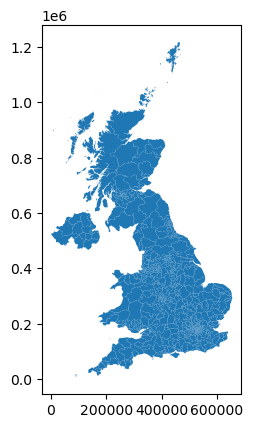

In [161]:
gb_data = gpd.read_file('Data/GB/GB_Constituencies_2023.shp')
gb_data.plot()